Analyzing retail sales data to identify seasonal trends and forecast future sales using basic time
series analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('advance stage\\task1resources\\sales data-set.csv',encoding='latin1')
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [9]:
df.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [14]:
df['Date'] = pd.DatetimeIndex(df['Date'])
df = df.set_index('Date')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-05-02 to 2012-10-26
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Weekly_Sales  421570 non-null  float64
 3   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2)
memory usage: 13.3 MB


In [16]:
df.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-05-02,1,1,24924.50,False
2010-12-02,1,1,46039.49,True
2010-02-19,1,1,41595.55,False
2010-02-26,1,1,19403.54,False
2010-05-03,1,1,21827.90,False


<Axes: xlabel='IsHoliday'>

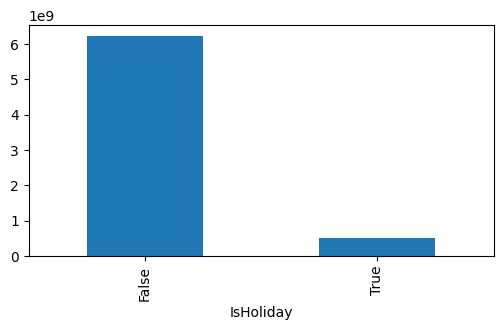

In [34]:
df.groupby('IsHoliday')['Weekly_Sales'].sum().plot(figsize=(6,3),kind='bar')

In [35]:
df['Weekly_Sales'].sort_values(ascending=False).head(10)

Date
2010-11-26    693099.36
2011-11-25    649770.18
2011-11-25    630999.19
2010-11-26    627962.93
2010-11-26    474330.10
2010-11-26    422306.25
2010-11-26    420586.57
2010-12-24    406988.63
2010-12-24    404245.03
2010-11-26    393705.20
Name: Weekly_Sales, dtype: float64

resampling monthly sales 

In [21]:
monthly = df['Weekly_Sales'].resample('ME').sum()
monthly.head()

Date
2010-01-31    4.223988e+07
2010-02-28    1.915869e+08
2010-03-31    1.862262e+08
2010-04-30    1.838118e+08
2010-05-31    2.806119e+08
Freq: ME, Name: Weekly_Sales, dtype: float64

In [38]:
monthly.sort_values(ascending=False).head(10)

Date
2010-12-31    3.235716e+08
2012-06-30    2.923883e+08
2010-05-31    2.806119e+08
2011-04-30    2.789693e+08
2011-11-30    2.534703e+08
2010-10-31    2.311201e+08
2011-09-30    2.310323e+08
2012-03-31    2.307397e+08
2011-12-31    2.293760e+08
2011-07-31    2.244611e+08
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='Date'>

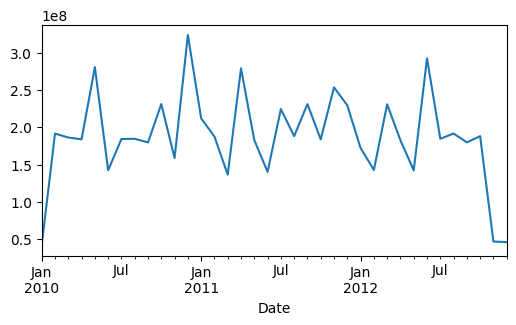

In [23]:
monthly.plot(figsize=(6,3),kind='line')

Train Model (ARIMA)

In [31]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(monthly, order=(2,1,2))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                   36
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -679.412
Date:                Wed, 17 Dec 2025   AIC                           1368.824
Time:                        12:19:15   BIC                           1376.601
Sample:                    01-31-2010   HQIC                          1371.509
                         - 12-31-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1132      0.258     -0.439      0.660      -0.618       0.392
ar.L2         -0.5466      0.240     -2.281      0.023      -1.016      -0.077
ma.L1         -0.4650      0.228     -2.038      0.042      -0.912      -0.018
ma.L2          0.7492      0.222      3.368      0.001       0.313       1.185
sigma2       3.89e+15   1.65e-17   2.36e+32      0.000    3.89e+15    3.89e+15
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 0.70
Prob(Q):                              0.79   Prob(JB):                         0.70
Heteroskedasticity (H):               0.61   Skew:                             0.30
Prob(H) (two-sided):                  0.41   Kurtosis:                         2.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.48e+48. Standard errors may be unstable.
"""

Forecasting  Future Sales

In [32]:
forecast = result.forecast(steps=12)

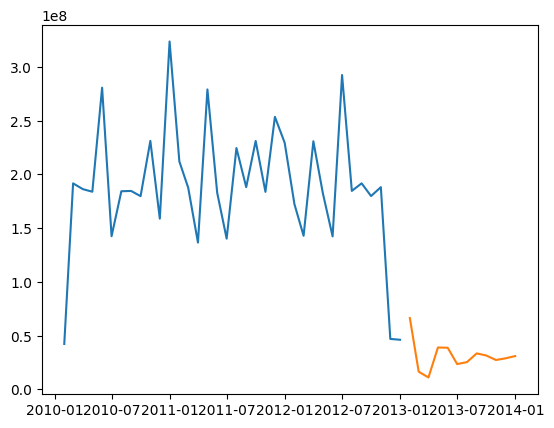

In [33]:
plt.plot(monthly)
plt.plot(forecast)

insights
• Expected sales fall
• Seasonal patterns rises during mid year
• Stock planning suggestions can turned towards selling 
